# Overview

The objective of this notebook is to build a function that combines acf/pacf to arima gridsearch to automatically determine ARIMA model

In [7]:
import pandas as pd
import numpy as np
import os
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
warnings.simplefilter('ignore', category=UserWarning)

from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

%matplotlib inline

## Data Preparation

In [110]:
symbols=["SPY", "AAPL", "MSFT"]# , "AMZN", "FB", "GOOGL", "GOOG", "BRK.B", "JNJ", "JPM", "V"] #big 10 symbols to collect
pricetype = "close"
analysis_date_start = "2019-01-04"
analysis_date_end = "2020-01-01"

In [111]:
filepath = "../data/{}_daily01.csv".format("SPY")
stock_df = pd.read_csv(filepath)
stock_df = stock_df[(stock_df.to_datetime > analysis_date_start) & (stock_df.to_datetime < analysis_date_end)]

In [113]:
stock_df["datetime"] = stock_df["to_datetime"]
stock_df.drop(columns="to_datetime", inplace=True)

In [115]:
stock_df["datetime"] = pd.to_datetime(stock_df["datetime"])

In [116]:
stock_df.index = stock_df.datetime

In [117]:
stock_df

,open,high,low,close,volume,datetime
datetime,,,,,,
2019-01-04 01:00:00,247.59,253.11,247.17,252.39,142628830,2019-01-04 01:00:00
2019-01-07 01:00:00,252.69,255.95,251.69,254.38,103139100,2019-01-07 01:00:00
2019-01-08 01:00:00,256.82,257.31,254.00,256.77,102512587,2019-01-08 01:00:00
2019-01-09 01:00:00,257.56,258.91,256.19,257.97,95006554,2019-01-09 01:00:00
2019-01-10 01:00:00,256.26,259.16,255.50,258.88,96823923,2019-01-10 01:00:00
...,...,...,...,...,...,...
2019-12-24 01:00:00,321.47,321.52,320.90,321.23,20270007,2019-12-24 01:00:00
2019-12-26 01:00:00,321.65,322.95,321.64,322.94,31024188,2019-12-26 01:00:00
2019-12-27 01:00:00,323.74,323.80,322.28,322.86,42554820,2019-12-27 01:00:00


## Auto GridSearch Best ARIMA

In [ ]:
# Generate 

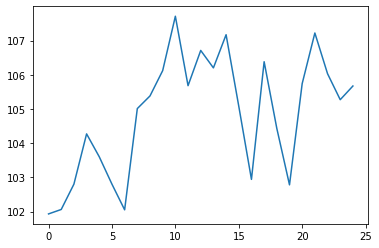

In [42]:
plt.plot(test_values)

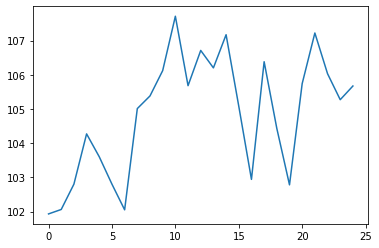

In [56]:
diff_test_values = pd.DataFrame(stock_df[pricetype].values[:25])
diff_test_values = diff_test_values
plt.plot(diff_test_values)

In [73]:
model = ARIMA(test_values, order=(2,2,2)) #fit and predictarima_model = model.fit()
arima_model = model.fit()
model_prediction = arima_model.forecast(steps=5)

In [74]:
model_prediction

array([105.76119155, 105.89078098, 106.11395383, 106.23085007,
       106.41044929])

In [81]:
type(arima_model)

statsmodels.tsa.arima.model.ARIMAResultsWrapper

In [91]:
from statsmodels.tsa.api import STLForecast
from statsmodels.tsa.seasonal import STL

In [118]:
stock_df.index

DatetimeIndex(['2019-01-04 01:00:00', '2019-01-07 01:00:00',
               '2019-01-08 01:00:00', '2019-01-09 01:00:00',
               '2019-01-10 01:00:00', '2019-01-11 01:00:00',
               '2019-01-14 01:00:00', '2019-01-15 01:00:00',
               '2019-01-16 01:00:00', '2019-01-17 01:00:00',
               ...
               '2019-12-17 01:00:00', '2019-12-18 01:00:00',
               '2019-12-19 01:00:00', '2019-12-20 01:00:00',
               '2019-12-23 01:00:00', '2019-12-24 01:00:00',
               '2019-12-26 01:00:00', '2019-12-27 01:00:00',
               '2019-12-30 01:00:00', '2019-12-31 01:00:00'],
              dtype='datetime64[ns]', name='datetime', length=250, freq=None)

In [119]:
test_values2 =stock_df[pricetype]
test_values2[:40]

datetime
2019-01-04 01:00:00    252.39
2019-01-07 01:00:00    254.38
2019-01-08 01:00:00    256.77
2019-01-09 01:00:00    257.97
2019-01-10 01:00:00    258.88
2019-01-11 01:00:00    258.98
2019-01-14 01:00:00    257.40
2019-01-15 01:00:00    260.35
2019-01-16 01:00:00    260.98
2019-01-17 01:00:00    262.96
2019-01-18 01:00:00    266.46
2019-01-22 01:00:00    262.86
2019-01-23 01:00:00    263.41
2019-01-24 01:00:00    263.55
2019-01-25 01:00:00    265.78
2019-01-28 01:00:00    263.76
2019-01-29 01:00:00    263.41
2019-01-30 01:00:00    267.58
2019-01-31 01:00:00    269.93
2019-02-01 01:00:00    270.06
2019-02-04 01:00:00    271.96
2019-02-05 01:00:00    273.10
2019-02-06 01:00:00    272.74
2019-02-07 01:00:00    270.14
2019-02-08 01:00:00    270.47
2019-02-11 01:00:00    270.62
2019-02-12 01:00:00    274.10
2019-02-13 01:00:00    274.99
2019-02-14 01:00:00    274.38
2019-02-15 01:00:00    277.37
2019-02-19 01:00:00    277.85
2019-02-20 01:00:00    278.41
2019-02-21 01:00:00    277.42
2

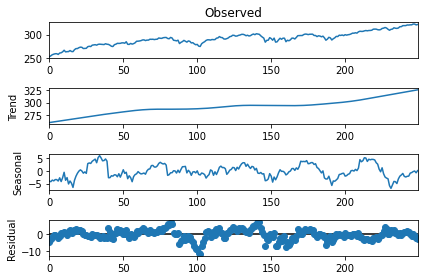

In [138]:
res = STL(test_values2.values, period=40).fit()
res.plot()
plt.show()

In [145]:
stlf = STLForecast(test_values2.values, ARIMA, model_kwargs={"order": (2, 1, 2)},period=40)
res = stlf.fit()
forecasts = res.forecast(5)

In [146]:
forecasts

array([326.26776488, 325.37289933, 325.63848804, 326.85077111,
       326.85995751])

In [ ]:
statsmodels.tsa.arima.model.ARIMA

In [132]:
res = sm.tsa.arma_order_select_ic(test_values2.values, ic=["aic", "bic"], trend="nc")


C:\Users\Yung\Anaconda3\envs\fitsnbits\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Yung\Anaconda3\envs\fitsnbits\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and st

(1, 1)

In [134]:

res.bic_min_order

(1, 1)

In [133]:
res.aic_min_order

(2, 1)

In [100]:
stock_df.index = stock_df.to_datetime

In [131]:

import statsmodels.api as sm
import numpy as np
arparams = np.array([.75, -.25])
maparams = np.array([.65, .35])
arparams = np.r_[1, -arparams]
maparam = np.r_[1, maparams]
nobs = 250
np.random.seed(2014)
y = arma_generate_sample(arparams, maparams, nobs)
res = sm.tsa.arma_order_select_ic(y, ic=["aic", "bic"], trend="nc")
res.aic_min_order
res.bic_min_order

C:\Users\Yung\Anaconda3\envs\fitsnbits\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Yung\Anaconda3\envs\fitsnbits\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and st

(1, 2)

In [ ]:
arima_model()

In [44]:
from statsmodels.tsa.arima_process import arma_generate_sample
import statsmodels.api as sm
import numpy as np
arparams = np.array([.75, -.25])
maparams = np.array([.65, .35])
arparams = np.r_[1, -arparams]
maparam = np.r_[1, maparams]
nobs = 250
np.random.seed(2014)
y = arma_generate_sample(arparams, maparams, nobs)
res = sm.tsa.arma_order_select_ic(y, ic=["aic", "bic"], trend="nc")
res.aic_min_order
res.bic_min_order

C:\Users\Yung\Anaconda3\envs\fitsnbits\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Yung\Anaconda3\envs\fitsnbits\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and st

(1, 2)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


C:\Users\Yung\Anaconda3\envs\fitsnbits\lib\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,
C:\Users\Yung\Anaconda3\envs\fitsnbits\lib\site-packages\statsmodels\tsa\stattools.py:666: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,
C:\Users\Yung\Anaconda3\envs\fitsnbits\lib\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,
C:\Users\Yung\Anaconda3\envs\fitsnbits\lib\site-packages\statsmodels\tsa\stattools.py:666: FutureWarning: fft=True will become the default aft

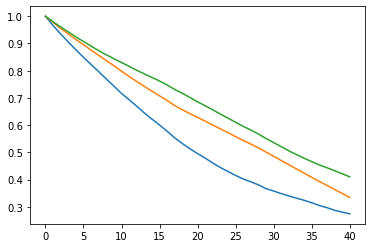

In [13]:
for symbol in symbols:
    filepath = "../data/{}_daily01.csv".format(symbol)
    stock_df = pd.read_csv(filepath)
    stock_df = stock_df[(stock_df.to_datetime > analysis_date_start) & (stock_df.to_datetime < analysis_date_end)][pricetype]
    acf_result = acf(stock_df)
    print(type(acf_result))
    plt.plot(acf_result)
#     plot_title = "{} ACF and PACF".format(symbol)
#     fig, ax = plt.subplots(1,2, figsize=(9,6))
#     plot_acf(stock_df.values, ax=ax[0]);
#     plot_pacf(stock_df.values, ax=ax[1]);
#     fig.suptitle(plot_title, size=18)

<class 'tuple'>
(41,)
[ 1.00000000e+00  9.69889222e-01  3.10493108e-02  1.27593124e-02
 -7.61310292e-03  9.13116680e-03 -1.07554083e-03 -4.39077395e-04
 -3.44250352e-02 -4.18381161e-03 -2.84199365e-02  5.05579508e-02
 -2.11369744e-02 -3.39454063e-02  1.40001132e-02  1.33979489e-02
 -3.67155540e-02 -4.88355707e-02  4.39294617e-02  2.26902390e-02
  2.36965710e-02  1.22318954e-03 -3.87526898e-02  1.96551049e-02
  2.91359818e-02  3.90655524e-05  8.56103129e-03  3.86883899e-02
 -8.48831380e-03 -5.88035645e-02  8.52226351e-02 -1.76684073e-02
  1.23886459e-02  1.24861218e-02 -6.60061268e-03 -2.71455308e-02
 -3.51353040e-02  5.21070203e-02 -3.74670394e-02  2.96713775e-02
  1.46152344e-02]
(41, 2)
[[ 1.          1.        ]
 [ 0.84593022  1.09384823]
 [-0.0929097   0.15500832]
 [-0.11119969  0.13671832]
 [-0.13157211  0.1163459 ]
 [-0.11482784  0.13309017]
 [-0.12503455  0.12288347]
 [-0.12439808  0.12351993]
 [-0.15838404  0.08953397]
 [-0.12814282  0.11977519]
 [-0.15237894  0.09553907]
 [-0.

C:\Users\Yung\Anaconda3\envs\fitsnbits\lib\site-packages\statsmodels\tsa\stattools.py:1021: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs // 2 - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,
C:\Users\Yung\Anaconda3\envs\fitsnbits\lib\site-packages\statsmodels\tsa\stattools.py:1021: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs // 2 - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,
C:\Users\Yung\Anaconda3\envs\fitsnbits\lib\site-packages\statsmodels\tsa\stattools.py:1021: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs // 2 - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,


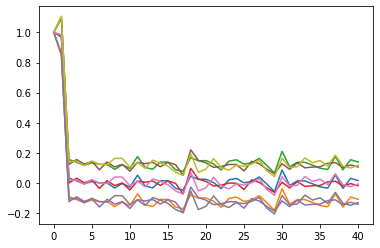

In [28]:
for symbol in symbols:
    filepath = "../data/{}_daily01.csv".format(symbol)
    stock_df = pd.read_csv(filepath)
    stock_df = stock_df[(stock_df.to_datetime > analysis_date_start) & (stock_df.to_datetime < analysis_date_end)][pricetype]
    pacf_result = pacf(stock_df, alpha=0.05)
    print(type(pacf_result))
    print(pacf_result[0].shape)
    print(pacf_result[0])
    print(pacf_result[1].shape)
    print(pacf_result[1])
    plt.plot(pacf_result[0])
    plt.plot(pacf_result[1])

In [29]:
def ARIMA_gridsearch(p, d_max:int, q_max:int, data, prediction_length):
    return_list = [] #initialize return list
    train_data_idx = len(data) - prediction_length
    train = data[:train_data_idx] #slice train and test data
    test = data[train_data_idx:]
    d_range = range(0, d_max+1)
    q_range = range(1, q_max+1)
    for d in d_range:
        for q in q_range:
            model = ARIMA(train, order=(p,d,q)) #fit and predict
            arima_model = model.fit()
            model_prediction = arima_model.forecast(steps=prediction_length)
            warning = arima_model.mle_retvals["warnflag"]
            convergence = arima_model.mle_retvals["converged"]
            rmse_result = np.sqrt(mean_squared_error(test, model_prediction)) #get rmse
            return_list.append([p,d,q,convergence, warning, rmse_result])
    return sorted(return_list, key=lambda x: (x[-1], x[-2], (x[-3]*-1))) #order by RMSE, no warning, and convergence

In [32]:
for symbol in symbols:
    filepath = "../data/{}_daily01.csv".format(symbol)
    stock_df = pd.read_csv(filepath)
    stock_df = stock_df[(stock_df.to_datetime > analysis_date_start) & (stock_df.to_datetime < analysis_date_end)][pricetype]
    grid_result = ARIMA_gridsearch(4, 3, 4, stock_df.values, 30)
    print(symbol)
    print(grid_result)

SPY
[[4, 2, 1, True, 0, 2.364195222441467], [4, 2, 4, False, 1, 2.376068706060797], [4, 2, 2, True, 0, 2.380089872772744], [4, 2, 3, False, 1, 2.4460391708999296], [4, 3, 3, False, 1, 3.9086198126718372], [4, 3, 4, False, 1, 4.189635760763447], [4, 1, 4, False, 1, 4.925671652018947], [4, 1, 1, True, 0, 6.067742281246259], [4, 1, 2, False, 1, 6.1541845561440125], [4, 1, 3, False, 1, 6.281136047846952], [4, 0, 4, False, 1, 6.430454524063897], [4, 0, 2, False, 1, 7.022610546643211], [4, 0, 3, False, 1, 7.376284352611175], [4, 0, 1, True, 0, 7.94746935809074], [4, 3, 1, True, 0, 9.754326202553715], [4, 3, 2, True, 0, 10.4106753798811]]
AAPL
[[4, 2, 1, True, 0, 1.5256281211765224], [4, 2, 3, True, 0, 1.529443294207699], [4, 2, 4, True, 0, 1.5345266573716634], [4, 1, 3, False, 1, 1.5484746035480874], [4, 1, 2, False, 1, 1.603789046103891], [4, 1, 1, True, 0, 1.6051689375782199], [4, 1, 4, False, 1, 1.6437753262038601], [4, 2, 2, True, 0, 1.9640255022231319], [4, 3, 1, True, 0, 2.785698003552